# Third: Evaluate Data Quality Issues in the Data Provided

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

# Quality issues in receipt

### preprocessing

In [2]:
receipt = pd.read_json('receipts.json.gz',lines=True,compression='gzip')

In [3]:
receipt.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [4]:
receipt["_id"] = [element['$oid'] for element in receipt['_id']]

In [5]:
createDate= [datetime.fromtimestamp(element['$date']/1000.0).strftime("%m/%d/%Y, %H:%M:%S") if not pd.isna(element) else float("nan") for element in receipt['createDate']]
receipt['createDate'] = createDate

In [6]:
dateScanned= [datetime.fromtimestamp(element['$date']/1000.0).strftime("%m/%d/%Y, %H:%M:%S") if not pd.isna(element) else float("nan") for element in receipt['dateScanned']]

receipt['dateScanned'] = dateScanned

In [7]:
finishedDate= [datetime.fromtimestamp(element['$date']/1000.0).strftime("%m/%d/%Y, %H:%M:%S") if not pd.isna(element) else float("nan") for element in receipt['finishedDate']]

receipt['finishedDate'] = finishedDate

In [8]:
modifyDate= [datetime.fromtimestamp(element['$date']/1000.0).strftime("%m/%d/%Y, %H:%M:%S") if not pd.isna(element) else float("nan") for element in receipt['modifyDate']]

receipt['modifyDate'] = modifyDate

In [9]:
pointsAwardedDate= [datetime.fromtimestamp(element['$date']/1000.0).strftime("%m/%d/%Y, %H:%M:%S") if not pd.isna(element) else float("nan") for element in receipt['pointsAwardedDate']]

receipt['pointsAwardedDate'] = pointsAwardedDate

In [10]:
purchaseDate= [datetime.fromtimestamp(element['$date']/1000.0).strftime("%m/%d/%Y, %H:%M:%S") if not pd.isna(element) else float("nan") for element in receipt['purchaseDate']]

receipt['purchaseDate'] = purchaseDate

In [11]:
receipt.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...","01/03/2021, 10:25:31","01/03/2021, 10:25:31","01/03/2021, 10:25:31","01/03/2021, 10:25:36","01/03/2021, 10:25:31",500.0,"01/02/2021, 19:00:00",5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...","01/03/2021, 10:24:43","01/03/2021, 10:24:43","01/03/2021, 10:24:43","01/03/2021, 10:24:48","01/03/2021, 10:24:43",150.0,"01/02/2021, 10:24:43",2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,"01/03/2021, 10:25:37","01/03/2021, 10:25:37",NaN,"01/03/2021, 10:25:42",NaN,5.0,"01/02/2021, 19:00:00",1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,"01/03/2021, 10:25:34","01/03/2021, 10:25:34","01/03/2021, 10:25:34","01/03/2021, 10:25:39","01/03/2021, 10:25:34",5.0,"01/02/2021, 19:00:00",4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,"01/03/2021, 10:25:06","01/03/2021, 10:25:06","01/03/2021, 10:25:11","01/03/2021, 10:25:11","01/03/2021, 10:25:06",5.0,"01/02/2021, 10:25:06",2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [12]:
df = pd.DataFrame(receipt['rewardsReceiptItemList'])

In [13]:
# Data format not consistent, so not able to process in batch

receipt['rewardsReceiptItemList'][1]

[{'barcode': '4011',
  'description': 'ITEM NOT FOUND',
  'finalPrice': '1',
  'itemPrice': '1',
  'partnerItemId': '1',
  'quantityPurchased': 1},
 {'barcode': '028400642255',
  'description': 'DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCED FAT BAG 1 OZ',
  'finalPrice': '10.00',
  'itemPrice': '10.00',
  'needsFetchReview': True,
  'needsFetchReviewReason': 'USER_FLAGGED',
  'partnerItemId': '2',
  'pointsNotAwardedReason': 'Action not allowed for user and CPG',
  'pointsPayerId': '5332f5fbe4b03c9a25efd0ba',
  'preventTargetGapPoints': True,
  'quantityPurchased': 1,
  'rewardsGroup': 'DORITOS SPICY SWEET CHILI SINGLE SERVE',
  'rewardsProductPartnerId': '5332f5fbe4b03c9a25efd0ba',
  'userFlaggedBarcode': '028400642255',
  'userFlaggedDescription': 'DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCED FAT BAG 1 OZ',
  'userFlaggedNewItem': True,
  'userFlaggedPrice': '10.00',
  'userFlaggedQuantity': 1}]

In [14]:
receipt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      1119 non-null   object 
 1   bonusPointsEarned        544 non-null    float64
 2   bonusPointsEarnedReason  544 non-null    object 
 3   createDate               1119 non-null   object 
 4   dateScanned              1119 non-null   object 
 5   finishedDate             568 non-null    object 
 6   modifyDate               1119 non-null   object 
 7   pointsAwardedDate        537 non-null    object 
 8   pointsEarned             609 non-null    float64
 9   purchaseDate             671 non-null    object 
 10  purchasedItemCount       635 non-null    float64
 11  rewardsReceiptItemList   679 non-null    object 
 12  rewardsReceiptStatus     1119 non-null   object 
 13  totalSpent               684 non-null    float64
 14  userId                  

In [15]:
receipt.describe()

,bonusPointsEarned,pointsEarned,purchasedItemCount,totalSpent
count,544.000000,609.000000,635.00000,684.000000
mean,238.893382,585.962890,14.75748,77.796857
std,299.091731,1357.166947,61.13424,347.110349
min,5.000000,0.000000,0.00000,0.000000
25%,5.000000,5.000000,1.00000,1.000000
50%,45.000000,150.000000,2.00000,18.200000
75%,500.000000,750.000000,5.00000,34.960000
max,750.000000,10199.800000,689.00000,4721.950000


### Part 1: checking duplicates

In [16]:
#id is unique
receipt._id.nunique()

1119

In [17]:
#In total 258 customers
receipt.userId.nunique()

258

In [18]:
receipt.bonusPointsEarnedReason.unique()

array(['Receipt number 2 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)',
       'Receipt number 5 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)',
       'All-receipts receipt bonus',
       'Receipt number 1 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)',
       'Receipt number 3 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)',
       'Receipt number 6 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)',
       'Receipt number 4 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)',
       nan, 'COMPLETE_PARTNER_RECEIPT', 'COMPLETE_NONPARTNER_RECEIPT'],
      dtype=object)

### Part 2 : checking missing values

In [19]:
#calculate missing value percentage
def missing_values(df,norows):   # input by the df and the number of rows that you want to show
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round(((df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100),2).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return(missing_data.head(norows))

In [20]:
missing_values(receipt,20)

,Total,Percent
pointsAwardedDate,582,52.01
bonusPointsEarnedReason,575,51.39
bonusPointsEarned,575,51.39
finishedDate,551,49.24
pointsEarned,510,45.58
purchasedItemCount,484,43.25
purchaseDate,448,40.04
rewardsReceiptItemList,440,39.32
totalSpent,435,38.87
userId,0,0.00


### Part 3 : checking abnormal values

In [21]:
import matplotlib.pyplot as plt

In [22]:
cols = ['bonusPointsEarned', 'pointsEarned','purchasedItemCount','totalSpent']

In [23]:
#remove missing values for plot
plot_data = receipt[~np.isnan(receipt[cols])]

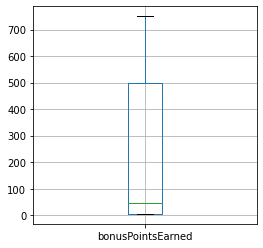

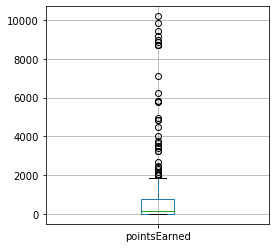

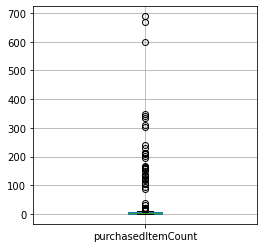

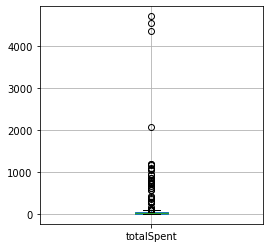

In [24]:
for col in cols:
    plt.figure(figsize=(4, 4))
    plot_data.boxplot(column=[col])

In [25]:
#checking receipts with 0 spent and over 1000 spent
receipt[receipt.totalSpent==0]

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
15,5ff1e1e90a7214ada1000569,NaN,NaN,"01/03/2021, 10:25:29","01/03/2021, 10:25:29",NaN,"01/03/2021, 10:25:29",NaN,NaN,NaN,0.0,"[{'needsFetchReview': True, 'needsFetchReviewR...",FLAGGED,0.0,5ff1e1e9b6a9d73a3a9f10f6
81,5ff4ce3c0a720f05230005c4,NaN,NaN,"01/05/2021, 15:38:20","01/05/2021, 15:38:20",NaN,"01/05/2021, 15:38:20",NaN,NaN,NaN,0.0,"[{'needsFetchReview': True, 'needsFetchReviewR...",FLAGGED,0.0,5ff4ce3cc1e2d0121a9b2fba
141,5ff73be90a720f052300060a,NaN,NaN,"01/07/2021, 11:50:49","01/07/2021, 11:50:49",NaN,"01/07/2021, 11:50:49",NaN,NaN,NaN,0.0,"[{'needsFetchReview': True, 'needsFetchReviewR...",FLAGGED,0.0,5ff73be9eb7c7d31ca8a45bc
144,5ff794600a7214ada1000647,NaN,NaN,"01/07/2021, 00:08:16","01/07/2021, 00:08:16",NaN,"01/07/2021, 12:08:17",NaN,NaN,NaN,0.0,"[{'needsFetchReview': True, 'needsFetchReviewR...",FLAGGED,0.0,5ff7946004929111f6e90ceb
175,5ff8da570a720f05c5000015,NaN,NaN,"01/08/2021, 17:19:03","01/08/2021, 17:19:03",NaN,"01/08/2021, 17:19:04",NaN,NaN,NaN,0.0,NaN,REJECTED,0.0,5ff8da28b3348b11c9337ac6
179,5ff8da7d0a720f05c500001c,NaN,NaN,"01/08/2021, 17:19:41","01/08/2021, 17:19:41",NaN,"01/08/2021, 17:19:41",NaN,NaN,NaN,0.0,"[{'needsFetchReview': True, 'needsFetchReviewR...",FLAGGED,0.0,5ff8da7db3348b11c9337b6a
282,6000d4aa0a720f05f3000072,NaN,NaN,"01/14/2021, 18:32:58","01/14/2021, 18:32:58",NaN,"01/14/2021, 18:32:58",NaN,NaN,NaN,0.0,"[{'needsFetchReview': True, 'needsFetchReviewR...",FLAGGED,0.0,6000d4aafb296c121a81b27e
396,6009eb000a7214ada2000003,250.0,"Receipt number 3 completed, bonus point schedu...","01/21/2021, 15:58:40","01/21/2021, 15:58:40","01/21/2021, 15:59:06","01/21/2021, 15:59:15","01/21/2021, 15:59:06",250.0,"01/20/2021, 19:00:00",0.0,NaN,FINISHED,0.0,6009e60450b3311194385009
424,600aff160a720f053500000c,500.0,"Receipt number 2 completed, bonus point schedu...","01/22/2021, 11:36:38","01/22/2021, 11:36:38","01/22/2021, 11:37:01","01/22/2021, 11:37:13","01/22/2021, 11:37:01",500.0,"01/21/2021, 19:00:00",0.0,NaN,FINISHED,0.0,600afb2a7d983a124e9aded0
544,60132b890a7214ad50000013,NaN,NaN,"01/28/2021, 16:24:25","01/28/2021, 16:24:25",NaN,"01/28/2021, 16:24:25",NaN,NaN,NaN,0.0,"[{'needsFetchReview': True, 'needsFetchReviewR...",FLAGGED,0.0,60132b8873c60b3ca7f3bae8


In [26]:
receipt[receipt.totalSpent > 1000]

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
314,60025cb80a720f05f300008d,750.0,"Receipt number 1 completed, bonus point schedu...","01/15/2021, 22:25:44","01/15/2021, 22:25:44","01/15/2021, 22:31:55","01/15/2021, 22:32:05","01/15/2021, 22:31:55",1658.3,"01/14/2021, 19:00:00",335.0,[{'description': 'EMIL' S SAUSAGE MUSHROOM PIZ...,FINISHED,1177.84,60025c65fb296c4ef805d9e6
318,600260210a720f05f300008f,750.0,"Receipt number 1 completed, bonus point schedu...","01/15/2021, 22:40:17","01/15/2021, 22:40:17","01/15/2021, 22:47:26","01/15/2021, 22:47:31","01/15/2021, 22:47:26",3659.4,"01/14/2021, 19:00:00",309.0,"[{'barcode': '028400643061', 'brandCode': 'DOR...",FINISHED,1043.18,60025fe0e257124ec6b99a87
407,60099c3c0a7214ad89000135,750.0,"Receipt number 1 completed, bonus point schedu...","01/21/2021, 10:22:36","01/21/2021, 10:22:36","01/21/2021, 10:28:37","01/21/2021, 10:31:10","01/21/2021, 10:28:37",4480.5,"01/20/2021, 19:00:00",341.0,"[{'barcode': '012000809941', 'brandCode': 'PEP...",FINISHED,1083.24,60099c1450b33111fd61f702
419,600996ac0a720f05fa000134,750.0,"Receipt number 1 completed, bonus point schedu...","01/21/2021, 09:58:52","01/21/2021, 09:58:52","01/21/2021, 10:11:25","01/21/2021, 10:16:08","01/21/2021, 10:11:25",6257.3,"01/16/2021, 19:00:00",348.0,"[{'barcode': '012000809941', 'brandCode': 'PEP...",FINISHED,1198.68,6009969150b33111fd61f6d9
423,600a1a8d0a7214ada2000008,750.0,"Receipt number 1 completed, bonus point schedu...","01/21/2021, 19:21:32","01/21/2021, 19:21:32","01/21/2021, 19:30:13","01/21/2021, 19:31:04","01/21/2021, 19:30:13",1178.7,"01/20/2021, 19:00:00",214.0,"[{'barcode': '041000022623', 'brandCode': 'KNO...",FINISHED,1183.10,600a1a457d983a124e9adb9b
431,600ba6ae0a7214ada2000010,750.0,"Receipt number 1 completed, bonus point schedu...","01/22/2021, 23:31:42","01/22/2021, 23:31:42","01/22/2021, 23:39:28","01/22/2021, 23:41:47","01/22/2021, 23:39:28",1044.3,"01/21/2021, 19:00:00",136.0,"[{'barcode': '076840100354', 'brandCode': 'BEN...",FINISHED,1107.82,600ba68e7d983a124e9ae1d3
446,600f24970a720f053500002f,NaN,NaN,"01/25/2021, 15:05:43","01/25/2021, 15:05:43",NaN,"01/25/2021, 15:25:25",NaN,NaN,"01/24/2021, 19:00:00",599.0,"[{'brandCode': 'BETTY CROCKER', 'description':...",FLAGGED,4368.80,600f20c15edb787dce060911
447,600f0cc70a720f053500002c,NaN,NaN,"01/25/2021, 13:24:07","01/25/2021, 13:24:07",NaN,"01/25/2021, 13:38:07",NaN,NaN,"01/24/2021, 19:00:00",303.0,"[{'brandCode': 'BETTY CROCKER', 'description':...",FLAGGED,2084.82,600f00d05edb787dce05fb84
469,600f39c30a7214ada2000030,750.0,"Receipt number 1 completed, bonus point schedu...","01/25/2021, 16:36:03","01/25/2021, 16:36:03","01/25/2021, 22:06:03","01/25/2021, 22:07:40","01/25/2021, 22:06:03",7137.2,"01/23/2021, 19:00:00",670.0,"[{'brandCode': 'BETTY CROCKER', 'description':...",FINISHED,4721.95,600f35015edb782098e2ac1b
543,600f2fc80a720f0535000030,750.0,"Receipt number 1 completed, bonus point schedu...","01/25/2021, 15:53:28","01/25/2021, 15:53:28","01/25/2021, 17:04:23","01/28/2021, 17:37:02","01/25/2021, 17:04:23",4944.7,"01/23/2021, 19:00:00",689.0,"[{'brandCode': 'BETTY CROCKER', 'description':...",FINISHED,4566.17,600f29a64329897eac239049


In [27]:
receipt[receipt.pointsEarned>5000]

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
12,5ff1e1b60a7214ada100055c,150.0,"Receipt number 5 completed, bonus point schedu...","01/03/2021, 10:24:38","01/03/2021, 10:24:38",NaN,"01/03/2021, 10:24:38",NaN,8850.0,"02/03/2021, 10:24:38",10.0,"[{'barcode': '034100573065', 'description': 'M...",FLAGGED,290.00,5ff1e194b6a9d73a3a9f1052
78,5fa5ad370a720f05ef000089,750.0,"Receipt number 1 completed, bonus point schedu...","11/06/2020, 15:08:23","11/06/2020, 15:08:23","01/05/2021, 15:53:40","01/05/2021, 15:53:40","01/05/2021, 15:53:40",9449.8,"11/05/2020, 15:08:23",11.0,"[{'barcode': '075925306254', 'competitiveProdu...",FINISHED,291.00,5fa5ad376a26f611e71ab5ef
131,5ff7945a0a7214ada1000646,750.0,"Receipt number 1 completed, bonus point schedu...","01/05/2021, 12:08:10","01/05/2021, 12:08:10","01/07/2021, 12:08:14","01/07/2021, 18:08:16","01/07/2021, 12:08:14",5750.0,"01/05/2021, 07:00:00",4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,27.00,5ff79459b3348b11c933736d
139,5ff73be10a7214ada1000619,NaN,NaN,"01/07/2021, 11:50:41","01/07/2021, 11:50:41",NaN,"01/07/2021, 11:50:41",NaN,8700.0,"02/07/2021, 11:50:41",10.0,"[{'barcode': '034100573065', 'description': 'M...",FLAGGED,290.00,5ff73b90eb7c7d31ca8a452b
158,5ff873f10a720f052300064f,500.0,"Receipt number 2 completed, bonus point schedu...","01/08/2021, 10:02:09","01/08/2021, 10:02:09",NaN,"01/08/2021, 10:02:10",NaN,9200.0,"02/08/2021, 10:02:10",10.0,"[{'barcode': '034100573065', 'description': 'M...",FLAGGED,290.00,5ff873d1b3348b11c9337716
190,5ffcb4900a720f0515000002,250.0,"Receipt number 3 completed, bonus point schedu...","01/11/2021, 15:26:56","01/11/2021, 15:26:56",NaN,"01/11/2021, 15:26:57",NaN,8950.0,"02/11/2021, 15:26:56",10.0,"[{'barcode': '034100573065', 'description': 'M...",FLAGGED,290.00,5ffcb47d04929111f6e9256c
265,5fff26f10a7214ad4c000018,NaN,NaN,"01/13/2021, 11:59:29","01/13/2021, 11:59:29",NaN,"01/13/2021, 11:59:29",NaN,8700.0,"02/13/2021, 11:59:29",10.0,"[{'barcode': '034100573065', 'description': 'M...",FLAGGED,290.00,5fff2698b3348b03eb45bb10
294,6000d4bc0a7214ad4c000070,NaN,NaN,"01/14/2021, 18:33:16","01/14/2021, 18:33:16",NaN,"01/14/2021, 18:33:17",NaN,8700.0,"02/14/2021, 18:33:17",10.0,"[{'barcode': '034100573065', 'description': 'M...",FLAGGED,290.00,6000d46cfb296c121a81b20c
361,60088d5d0a7214ad890000ed,750.0,"Receipt number 1 completed, bonus point schedu...","01/20/2021, 15:06:53","01/20/2021, 15:06:53","01/20/2021, 15:06:53","01/20/2021, 15:06:58","01/20/2021, 15:06:53",5850.0,"01/19/2021, 19:00:00",1.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,21.00,60088d5cb6310511daa4ee6f
374,60088d580a7214ad890000eb,750.0,"Receipt number 1 completed, bonus point schedu...","01/20/2021, 15:06:48","01/20/2021, 15:06:48","01/20/2021, 15:06:49","01/20/2021, 15:06:54","01/20/2021, 15:06:49",9850.0,"01/19/2021, 19:00:00",7.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,60088d58633aab121bb8e424


In [28]:
receipt['purchaseDate'].dtype

dtype('O')

In [29]:
#abnormal dates: purchased date should be later than datescanned

receipt['purchaseDate1'] = pd.to_datetime(receipt['purchaseDate'],infer_datetime_format=True)
receipt['dateScanned1'] = pd.to_datetime(receipt['dateScanned'],infer_datetime_format=True)

In [30]:
receipt['timediff'] = receipt['purchaseDate1']-receipt['dateScanned1']

In [31]:
receipt['timediff']

0        -1 days +08:34:29
1        -1 days +00:00:00
2        -1 days +08:34:23
3        -1 days +08:34:26
4        -1 days +00:00:00
               ...        
1114   -197 days +14:37:33
1115                   NaT
1116                   NaT
1117   -197 days +11:52:32
1118                   NaT
Name: timediff, Length: 1119, dtype: timedelta64[ns]

In [32]:
#abnormal dates 

receipt[receipt['timediff'] > timedelta(days = 0)]

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,purchaseDate1,dateScanned1,timediff
12,5ff1e1b60a7214ada100055c,150.0,"Receipt number 5 completed, bonus point schedu...","01/03/2021, 10:24:38","01/03/2021, 10:24:38",NaN,"01/03/2021, 10:24:38",NaN,8850.0,"02/03/2021, 10:24:38",10.0,"[{'barcode': '034100573065', 'description': 'M...",FLAGGED,290.0,5ff1e194b6a9d73a3a9f1052,2021-02-03 10:24:38,2021-01-03 10:24:38,31 days 00:00:00
14,5ff1e1b20a7214ada100055a,300.0,"Receipt number 4 completed, bonus point schedu...","01/03/2021, 10:24:34","01/03/2021, 10:24:34","01/03/2021, 10:24:35","01/03/2021, 10:24:35","01/03/2021, 10:24:35",300.0,"02/03/2021, 10:24:35",1.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052,2021-02-03 10:24:35,2021-01-03 10:24:34,31 days 00:00:01
85,5ff4ce640a7214ada10005e0,25.0,COMPLETE_NONPARTNER_RECEIPT,"01/05/2021, 15:39:00","01/05/2021, 15:39:00","01/05/2021, 15:39:00","01/05/2021, 15:39:00","01/05/2021, 15:39:00",25.0,"02/05/2021, 15:39:00",1.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff4ce33c3d63511e2a484b6,2021-02-05 15:39:00,2021-01-05 15:39:00,31 days 00:00:00
139,5ff73be10a7214ada1000619,NaN,NaN,"01/07/2021, 11:50:41","01/07/2021, 11:50:41",NaN,"01/07/2021, 11:50:41",NaN,8700.0,"02/07/2021, 11:50:41",10.0,"[{'barcode': '034100573065', 'description': 'M...",FLAGGED,290.0,5ff73b90eb7c7d31ca8a452b,2021-02-07 11:50:41,2021-01-07 11:50:41,31 days 00:00:00
158,5ff873f10a720f052300064f,500.0,"Receipt number 2 completed, bonus point schedu...","01/08/2021, 10:02:09","01/08/2021, 10:02:09",NaN,"01/08/2021, 10:02:10",NaN,9200.0,"02/08/2021, 10:02:10",10.0,"[{'barcode': '034100573065', 'description': 'M...",FLAGGED,290.0,5ff873d1b3348b11c9337716,2021-02-08 10:02:10,2021-01-08 10:02:09,31 days 00:00:01
190,5ffcb4900a720f0515000002,250.0,"Receipt number 3 completed, bonus point schedu...","01/11/2021, 15:26:56","01/11/2021, 15:26:56",NaN,"01/11/2021, 15:26:57",NaN,8950.0,"02/11/2021, 15:26:56",10.0,"[{'barcode': '034100573065', 'description': 'M...",FLAGGED,290.0,5ffcb47d04929111f6e9256c,2021-02-11 15:26:56,2021-01-11 15:26:56,31 days 00:00:00
244,5fff26ee0a720f05f300001a,25.0,COMPLETE_NONPARTNER_RECEIPT,"01/13/2021, 11:59:26","01/13/2021, 11:59:26","01/13/2021, 11:59:26","01/13/2021, 11:59:26","01/13/2021, 11:59:26",25.0,"02/13/2021, 11:59:26",1.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5fff2698b3348b03eb45bb10,2021-02-13 11:59:26,2021-01-13 11:59:26,31 days 00:00:00
265,5fff26f10a7214ad4c000018,NaN,NaN,"01/13/2021, 11:59:29","01/13/2021, 11:59:29",NaN,"01/13/2021, 11:59:29",NaN,8700.0,"02/13/2021, 11:59:29",10.0,"[{'barcode': '034100573065', 'description': 'M...",FLAGGED,290.0,5fff2698b3348b03eb45bb10,2021-02-13 11:59:29,2021-01-13 11:59:29,31 days 00:00:00
294,6000d4bc0a7214ad4c000070,NaN,NaN,"01/14/2021, 18:33:16","01/14/2021, 18:33:16",NaN,"01/14/2021, 18:33:17",NaN,8700.0,"02/14/2021, 18:33:17",10.0,"[{'barcode': '034100573065', 'description': 'M...",FLAGGED,290.0,6000d46cfb296c121a81b20c,2021-02-14 18:33:17,2021-01-14 18:33:16,31 days 00:00:01
362,600887560a720f05fa000098,250.0,"Receipt number 3 completed, bonus point schedu...","01/20/2021, 14:41:10","01/20/2021, 14:41:10","01/20/2021, 14:41:11","01/20/2021, 14:41:11","01/20/2021, 14:41:11",250.0,"02/20/2021, 14:41:10",1.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,6008873eb6310511daa4e8eb,2021-02-20 14:41:10,2021-01-20 14:41:10,31 days 00:00:00


In [88]:
receipt.dateScanned1.min()

Timestamp('2020-10-30 16:17:59')

In [33]:
#one customer scanned 436 times
receipt['userId'].value_counts().head(10)

5fc961c3b8cfca11a077dd33    436
59c124bae4b0299e55b0f330     58
54943462e4b07e684157a532     50
5fa41775898c7a11a6bcef3e     21
5ff5d15aeb7c7d12096d91a2     20
600fb1ac73c60b12049027bb     16
5ff1e194b6a9d73a3a9f1052     14
600987d77d983a11f63cfa92     10
5ff47392c3d63511e2a47881     10
5a43c08fe4b014fd6b6a0612      9
Name: userId, dtype: int64

In [34]:
#most of this customer records is null
receipt[receipt['userId']=='5fc961c3b8cfca11a077dd33'] 

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,purchaseDate1,dateScanned1,timediff
557,601487f80a720f05f800018d,NaN,NaN,"01/29/2021, 17:11:04","01/29/2021, 17:11:04",NaN,"01/29/2021, 17:11:04",NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,NaT,2021-01-29 17:11:04,NaT
577,601487e20a7214ad5000010d,NaN,NaN,"01/29/2021, 17:10:42","01/29/2021, 17:10:42",NaN,"01/29/2021, 17:10:42",NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,NaT,2021-01-29 17:10:42,NaT
579,601510460a7214ad5000014a,NaN,NaN,"01/30/2021, 02:52:38","01/30/2021, 02:52:38",NaN,"01/30/2021, 02:52:38",NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,NaT,2021-01-30 02:52:38,NaT
580,60157c190a720f05f80001eb,NaN,NaN,"01/30/2021, 10:32:41","01/30/2021, 10:32:41",NaN,"01/30/2021, 10:32:41",NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,NaT,2021-01-30 10:32:41,NaT
581,6014aa550a720f05f800019b,NaN,NaN,"01/29/2021, 19:37:41","01/29/2021, 19:37:41",NaN,"01/29/2021, 19:37:41",NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,NaT,2021-01-29 19:37:41,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,603cc0630a720fde100003e6,25.0,COMPLETE_NONPARTNER_RECEIPT,"03/01/2021, 05:22:27","03/01/2021, 05:22:27",NaN,"03/01/2021, 05:22:28",NaN,25.0,"08/16/2020, 20:00:00",2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33,2020-08-16 20:00:00,2021-03-01 05:22:27,-197 days +14:37:33
1115,603d0b710a720fde1000042a,NaN,NaN,"03/01/2021, 10:42:41","03/01/2021, 10:42:41",NaN,"03/01/2021, 10:42:41",NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,NaT,2021-03-01 10:42:41,NaT
1116,603cf5290a720fde10000413,NaN,NaN,"03/01/2021, 09:07:37","03/01/2021, 09:07:37",NaN,"03/01/2021, 09:07:37",NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,NaT,2021-03-01 09:07:37,NaT
1117,603ce7100a7217c72c000405,25.0,COMPLETE_NONPARTNER_RECEIPT,"03/01/2021, 08:07:28","03/01/2021, 08:07:28",NaN,"03/01/2021, 08:07:29",NaN,25.0,"08/16/2020, 20:00:00",2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33,2020-08-16 20:00:00,2021-03-01 08:07:28,-197 days +11:52:32


### Part 4 : checking table joins

In [35]:
#user_id is the foreign key to connect users, so check if there is linkage problem

users = pd.read_json('users.json.gz',lines=True,compression='gzip')

In [36]:
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [37]:
users["_id"] = [element['$oid'] for element in users['_id']]

In [38]:
createdDate= [datetime.fromtimestamp(element['$date']/1000.0).strftime("%m/%d/%Y, %H:%M:%S") if not pd.isna(element) else float("nan") for element in users['createdDate']]

users['createdDate'] = createdDate

In [39]:
lastLogin= [datetime.fromtimestamp(element['$date']/1000.0).strftime("%m/%d/%Y, %H:%M:%S") if not pd.isna(element) else float("nan") for element in users['lastLogin']]

users['lastLogin'] = lastLogin

In [40]:
users

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,"01/03/2021, 10:24:04","01/03/2021, 10:25:37",consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,"01/03/2021, 10:24:04","01/03/2021, 10:25:37",consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,"01/03/2021, 10:24:04","01/03/2021, 10:25:37",consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,"01/03/2021, 10:25:30","01/03/2021, 10:25:30",consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,"01/03/2021, 10:24:04","01/03/2021, 10:25:37",consumer,Email,WI
...,...,...,...,...,...,...,...
490,54943462e4b07e684157a532,True,"12/19/2014, 09:21:22","03/05/2021, 11:52:23",fetch-staff,NaN,NaN
491,54943462e4b07e684157a532,True,"12/19/2014, 09:21:22","03/05/2021, 11:52:23",fetch-staff,NaN,NaN
492,54943462e4b07e684157a532,True,"12/19/2014, 09:21:22","03/05/2021, 11:52:23",fetch-staff,NaN,NaN
493,54943462e4b07e684157a532,True,"12/19/2014, 09:21:22","03/05/2021, 11:52:23",fetch-staff,NaN,NaN


In [41]:
user1 = users.drop_duplicates()

In [42]:
user1

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,"01/03/2021, 10:24:04","01/03/2021, 10:25:37",consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,"01/03/2021, 10:25:30","01/03/2021, 10:25:30",consumer,Email,WI
6,5ff1e1e8cfcf6c399c274ad9,True,"01/03/2021, 10:25:28","01/03/2021, 10:25:28",consumer,Email,WI
7,5ff1e1b7cfcf6c399c274a5a,True,"01/03/2021, 10:24:39","01/03/2021, 10:24:39",consumer,Email,WI
9,5ff1e1f1cfcf6c399c274b0b,True,"01/03/2021, 10:25:37","01/03/2021, 10:25:37",consumer,Email,WI
...,...,...,...,...,...,...,...
435,5fc961c3b8cfca11a077dd33,True,"12/03/2020, 17:08:03","02/26/2021, 17:39:16",fetch-staff,Email,NH
455,5fa41775898c7a11a6bcef3e,True,"11/05/2020, 10:17:09","03/04/2021, 11:02:02",fetch-staff,Email,NaN
456,5fa32b4d898c7a11a6bcebce,True,"11/04/2020, 17:29:33","03/04/2021, 02:21:58",fetch-staff,Google,AL
462,5964eb07e4b03efd0c0f267b,True,"07/11/2017, 11:13:11","03/04/2021, 14:07:49",fetch-staff,NaN,IL


In [43]:
receipt1 = receipt.drop(columns=['rewardsReceiptItemList'])

In [44]:
receipt1.drop_duplicates()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId,purchaseDate1,dateScanned1,timediff
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...","01/03/2021, 10:25:31","01/03/2021, 10:25:31","01/03/2021, 10:25:31","01/03/2021, 10:25:36","01/03/2021, 10:25:31",500.0,"01/02/2021, 19:00:00",5.0,FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,2021-01-02 19:00:00,2021-01-03 10:25:31,-1 days +08:34:29
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...","01/03/2021, 10:24:43","01/03/2021, 10:24:43","01/03/2021, 10:24:43","01/03/2021, 10:24:48","01/03/2021, 10:24:43",150.0,"01/02/2021, 10:24:43",2.0,FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,2021-01-02 10:24:43,2021-01-03 10:24:43,-1 days +00:00:00
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,"01/03/2021, 10:25:37","01/03/2021, 10:25:37",NaN,"01/03/2021, 10:25:42",NaN,5.0,"01/02/2021, 19:00:00",1.0,REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,2021-01-02 19:00:00,2021-01-03 10:25:37,-1 days +08:34:23
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,"01/03/2021, 10:25:34","01/03/2021, 10:25:34","01/03/2021, 10:25:34","01/03/2021, 10:25:39","01/03/2021, 10:25:34",5.0,"01/02/2021, 19:00:00",4.0,FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,2021-01-02 19:00:00,2021-01-03 10:25:34,-1 days +08:34:26
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,"01/03/2021, 10:25:06","01/03/2021, 10:25:06","01/03/2021, 10:25:11","01/03/2021, 10:25:11","01/03/2021, 10:25:06",5.0,"01/02/2021, 10:25:06",2.0,FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,2021-01-02 10:25:06,2021-01-03 10:25:06,-1 days +00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,603cc0630a720fde100003e6,25.0,COMPLETE_NONPARTNER_RECEIPT,"03/01/2021, 05:22:27","03/01/2021, 05:22:27",NaN,"03/01/2021, 05:22:28",NaN,25.0,"08/16/2020, 20:00:00",2.0,REJECTED,34.96,5fc961c3b8cfca11a077dd33,2020-08-16 20:00:00,2021-03-01 05:22:27,-197 days +14:37:33
1115,603d0b710a720fde1000042a,NaN,NaN,"03/01/2021, 10:42:41","03/01/2021, 10:42:41",NaN,"03/01/2021, 10:42:41",NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,NaT,2021-03-01 10:42:41,NaT
1116,603cf5290a720fde10000413,NaN,NaN,"03/01/2021, 09:07:37","03/01/2021, 09:07:37",NaN,"03/01/2021, 09:07:37",NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,NaT,2021-03-01 09:07:37,NaT
1117,603ce7100a7217c72c000405,25.0,COMPLETE_NONPARTNER_RECEIPT,"03/01/2021, 08:07:28","03/01/2021, 08:07:28",NaN,"03/01/2021, 08:07:29",NaN,25.0,"08/16/2020, 20:00:00",2.0,REJECTED,34.96,5fc961c3b8cfca11a077dd33,2020-08-16 20:00:00,2021-03-01 08:07:28,-197 days +11:52:32


In [45]:
merged = pd.merge(receipt1, user1, left_on = 'userId',right_on = '_id',how='inner')

In [46]:
merged.shape

(971, 24)

In [47]:
#compare the length of receipt and after merging, we can find that 148 rows dont have matched userid

receipt1.shape[0] - merged.shape[0]

148

# Quality issues in user

In [48]:
# In last step, we have already pre-processed the data

In [49]:
# summary statistics
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           495 non-null    object
 1   active        495 non-null    bool  
 2   createdDate   495 non-null    object
 3   lastLogin     433 non-null    object
 4   role          495 non-null    object
 5   signUpSource  447 non-null    object
 6   state         439 non-null    object
dtypes: bool(1), object(6)
memory usage: 23.8+ KB


In [50]:
users.describe()

,_id,active,createdDate,lastLogin,role,signUpSource,state
count,495,495,495,433,495,447,439
unique,212,2,212,171,2,2,8
top,54943462e4b07e684157a532,True,"12/19/2014, 09:21:22","03/05/2021, 11:52:23",consumer,Email,WI
freq,20,494,20,20,413,443,396


In [51]:
users[users.role != 'consumer']

,_id,active,createdDate,lastLogin,role,signUpSource,state
395,59c124bae4b0299e55b0f330,True,"09/19/2017, 10:07:54","02/08/2021, 11:42:58",fetch-staff,NaN,WI
396,59c124bae4b0299e55b0f330,True,"09/19/2017, 10:07:54","02/08/2021, 11:42:58",fetch-staff,NaN,WI
397,59c124bae4b0299e55b0f330,True,"09/19/2017, 10:07:54","02/08/2021, 11:42:58",fetch-staff,NaN,WI
398,59c124bae4b0299e55b0f330,True,"09/19/2017, 10:07:54","02/08/2021, 11:42:58",fetch-staff,NaN,WI
399,59c124bae4b0299e55b0f330,True,"09/19/2017, 10:07:54","02/08/2021, 11:42:58",fetch-staff,NaN,WI
...,...,...,...,...,...,...,...
490,54943462e4b07e684157a532,True,"12/19/2014, 09:21:22","03/05/2021, 11:52:23",fetch-staff,NaN,NaN
491,54943462e4b07e684157a532,True,"12/19/2014, 09:21:22","03/05/2021, 11:52:23",fetch-staff,NaN,NaN
492,54943462e4b07e684157a532,True,"12/19/2014, 09:21:22","03/05/2021, 11:52:23",fetch-staff,NaN,NaN
493,54943462e4b07e684157a532,True,"12/19/2014, 09:21:22","03/05/2021, 11:52:23",fetch-staff,NaN,NaN


### Part 1: check duplicates

In [85]:
#see users.describe above
users.nunique()

_id             212
active            2
createdDate     212
lastLogin       171
role              2
signUpSource      2
state             8
timediff         64
dtype: int64

### Part 2: check missing values

In [53]:
#missing values in users table
missing_values(users,20)

,Total,Percent
lastLogin,62,12.53
state,56,11.31
signUpSource,48,9.70
role,0,0.00
createdDate,0,0.00
active,0,0.00
_id,0,0.00


### Part 3: check abnormal values

In [54]:
#First check if there is create date later than lastlogin date
users['createdDate'] = pd.to_datetime(users['createdDate'],infer_datetime_format=True)
users['lastLogin'] = pd.to_datetime(users['lastLogin'],infer_datetime_format=True)

In [55]:
users['timediff'] = users['createdDate'] -users['lastLogin']

In [56]:
users[users['timediff']> timedelta(days = 0)]

,_id,active,createdDate,lastLogin,role,signUpSource,state,timediff


In [57]:
#Then check min and max value for dates
#The date is after foundation date
users['createdDate'].min()

Timestamp('2014-12-19 09:21:22')

In [58]:
users['createdDate'].max()

Timestamp('2021-02-12 09:11:06')

In [59]:
users['lastLogin'].min()

Timestamp('2018-05-07 13:23:40')

In [60]:
users['lastLogin'].max()

Timestamp('2021-03-05 11:52:23')

# Quality issues in brand

In [61]:
brands = pd.read_json('brands.json.gz',lines=True,compression='gzip')

In [62]:
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


### preprocess data

In [63]:
oid = [element['$id']['$oid'] for element in brands['cpg']]
brands["oid"] = oid

ref = [element['$ref'] for element in brands['cpg']]
brands["ref"] = ref


In [64]:
brand_id = [element['$oid'] for element in brands['_id']]
brands["brand_id"] = brand_id

In [65]:
brands.drop(['_id', 'cpg'], axis=1,inplace = True)

In [66]:
brands.head()

,barcode,category,categoryCode,name,topBrand,brandCode,oid,ref,brand_id
0,511111019862,Baking,BAKING,test brand @1612366101024,0.0,NaN,601ac114be37ce2ead437550,Cogs,601ac115be37ce2ead437551
1,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,5332f5fbe4b03c9a25efd0ba,Cogs,601c5460be37ce2ead43755f
2,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,601ac142be37ce2ead437559,Cogs,601ac142be37ce2ead43755d
3,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,601ac142be37ce2ead437559,Cogs,601ac142be37ce2ead43755a
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,5332fa12e4b03c9a25efd1e7,Cogs,601ac142be37ce2ead43755e


### Step 1 : Check duplicates

In [67]:
#brand id is already unique
brands.brand_id.nunique()

1167

In [68]:
#cpg id has 196 values
brands.oid.nunique()

196

In [69]:
#barcode is not unique, 7 duplicates
brands.barcode.nunique()

1160

In [70]:
#duplicated records of barcode
brands[brands.duplicated('barcode')]

,barcode,category,categoryCode,name,topBrand,brandCode,oid,ref,brand_id
299,511111504139,Grocery,NaN,Pace,0.0,PACE,5a734034e4b0d58f376be874,Cogs,5a8c33f3e4b07f0a2dac8943
412,511111504788,Condiments & Sauces,NaN,The Pioneer Woman,NaN,PIONEER WOMAN,559c2234e4b06aca36af13c6,Cogs,5ccb2ece166eb31bbbadccbe
536,511111204923,Snacks,NaN,CHESTER'S,NaN,CHESTERS,5332f5fbe4b03c9a25efd0ba,Cogs,5d6027f46d5f3b23d1bc7906
651,511111305125,Magazines,NaN,Rachael Ray Everyday,NaN,511111305125,5d5d4fd16d5f3b23d1bc7905,Cogs,5d642d65a3a018514994f42d
1012,511111605058,Dairy,NaN,Brand2,1.0,09090909090,5c45f8b087ff3552f950f026,Cogs,5c4637ba87ff35681e840d57
1015,511111704140,NaN,NaN,Diet Chris Cola,NaN,DIETCHRIS2,55b62995e4b0d8e685c14213,Cogs,5a7e0665e4b0aedb3b84afd4
1071,511111004790,Condiments & Sauces,NaN,Bitten Dressing,NaN,BITTEN,559c2234e4b06aca36af13c6,Cogs,5cdacd63166eb33eb7ce0fa8


In [82]:
brands[brands.barcode == 511111605058]

,barcode,category,categoryCode,name,topBrand,brandCode,oid,ref,brand_id
194,511111605058,Magazines,NaN,Health Magazine,NaN,511111605058,5d5d4fd16d5f3b23d1bc7905,Cogs,5d6415d5a3a018514994f429
1012,511111605058,Dairy,NaN,Brand2,1.0,09090909090,5c45f8b087ff3552f950f026,Cogs,5c4637ba87ff35681e840d57


In [71]:
#check the category
#some duplicated categories
brands['category'].unique()

array(['Baking', 'Beverages', 'Candy & Sweets', 'Condiments & Sauces',
       'Canned Goods & Soups', nan, 'Magazines', 'Breakfast & Cereal',
       'Beer Wine Spirits', 'Health & Wellness', 'Beauty', 'Baby',
       'Frozen', 'Grocery', 'Snacks', 'Household', 'Personal Care',
       'Dairy', 'Cleaning & Home Improvement', 'Deli',
       'Beauty & Personal Care', 'Bread & Bakery', 'Outdoor',
       'Dairy & Refrigerated'], dtype=object)

In [72]:
brands['categoryCode'].unique()

array(['BAKING', 'BEVERAGES', 'CANDY_AND_SWEETS', nan,
       'HEALTHY_AND_WELLNESS', 'GROCERY', 'PERSONAL_CARE',
       'CLEANING_AND_HOME_IMPROVEMENT', 'BEER_WINE_SPIRITS', 'BABY',
       'BREAD_AND_BAKERY', 'OUTDOOR', 'DAIRY_AND_REFRIGERATED',
       'MAGAZINES', 'FROZEN'], dtype=object)

In [73]:
# category without code
brands[brands['category'] == 'Canned Goods & Soups']

,barcode,category,categoryCode,name,topBrand,brandCode,oid,ref,brand_id
8,511111504412,Canned Goods & Soups,NaN,Campbell's Home Style,0.0,CAMPBELLS HOME STYLE,5a734034e4b0d58f376be874,Cogs,5ab15636e4b0be0a89bb0b07
60,511111204206,Canned Goods & Soups,NaN,Swanson,0.0,SWANSON,5a734034e4b0d58f376be874,Cogs,5a8c36dbe4b0ccf165fac9e9
66,511111404392,Canned Goods & Soups,NaN,Campbell's Soup at Hand,0.0,CAMPBELLS SOUP AT HAND,5a734034e4b0d58f376be874,Cogs,5ab154dde4b0915382df761f
100,511111704379,Canned Goods & Soups,NaN,Campbell's Chunky Maxx,0.0,CAMPBELLS CHUNKY MAXX,5a734034e4b0d58f376be874,Cogs,5ab153fee4b0915382df761e
155,511111404446,Canned Goods & Soups,NaN,Campbell's Well Yes!,0.0,CAMPBELLS WELL YES,5a734034e4b0d58f376be874,Cogs,5ab158e8e4b0915382df7622
300,511111204435,Canned Goods & Soups,NaN,Campbell's Slow Kettle,0.0,CAMPBELLS SLOW KETTLE,5a734034e4b0d58f376be874,Cogs,5ab1589ae4b0915382df7621
338,511111204367,Canned Goods & Soups,NaN,Campbell's Chunky,0.0,CAMPBELLS CHUNKY,5a734034e4b0d58f376be874,Cogs,5ab15392e4b0915382df761d
363,511111800590,Canned Goods & Soups,NaN,LIPTON Soup,0.0,LIPTON Soup,5332f5f6e4b03c9a25efd0b4,Cogs,5a021703e4b00efe02b02a58
371,511111804116,Canned Goods & Soups,NaN,Wolfgang Puck,0.0,WOLFGANG PUCK,5a734034e4b0d58f376be874,Cogs,5a8c31bfe4b0ccf165fac9e4
791,511111704096,Canned Goods & Soups,NaN,Campbell's,0.0,CAMPBELLS,5a734034e4b0d58f376be874,Cogs,5a8c2f7ce4b0ccf165fac9e3


In [74]:
# categories that have missing code
brands[brands['categoryCode'].isnull()].category.unique()

array(['Condiments & Sauces', 'Canned Goods & Soups', 'Baking', nan,
       'Magazines', 'Breakfast & Cereal', 'Beer Wine Spirits', 'Beauty',
       'Baby', 'Frozen', 'Grocery', 'Snacks', 'Household', 'Beverages',
       'Personal Care', 'Health & Wellness', 'Dairy', 'Deli',
       'Beauty & Personal Care'], dtype=object)

### step 2: Check missing values

In [75]:
missing_values(brands,20)

,Total,Percent
categoryCode,650,55.70
topBrand,612,52.44
brandCode,234,20.05
category,155,13.28
brand_id,0,0.00
ref,0,0.00
oid,0,0.00
name,0,0.00
barcode,0,0.00


### step 3: check some distributions 

In [76]:
#percentage of non-top brand
round(brands[brands.topBrand==0].shape[0]/len(brands)*100,2)

44.9

In [77]:
#percentage of top brand
round(brands[brands.topBrand==1].shape[0]/len(brands)*100,2)

2.66

In [78]:
brands.ref.unique()

array(['Cogs', 'Cpgs'], dtype=object)

In [79]:
#percentage of cogs
round(brands[brands.ref == 'Cogs'].shape[0]/len(brands)*100,2)

87.4

In [80]:
#percentage of cpgs
round(brands[brands.ref == 'Cpgs'].shape[0]/len(brands)*100,2)

12.6